# **Importing Required Libraries**

- Import the required libraries for the project to the Colab environment.
- Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# Read the data in the csv file and made a copy so the original data doesn't get corrupted.
insurances = pd.read_csv("insurance.csv")
df = insurances.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
# Check for null values.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
# Since "Smoker" only takes two values, I changed it to categorical data. In this way, more efficient results can be obtained.
df['smoker'] = df['smoker'].astype('category')

In [22]:
# Obtain information such as the number of non-null entries in each column and the data type of the column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 64.3+ KB


# **Perform An Exploratory Data Analysis**
- Analyze the data and draw meaningful conclusions from the data.
- Try to use data visualization techniques as much as possible while examining the
data

# Examine the distribution of Bmi (Body Mass Index)

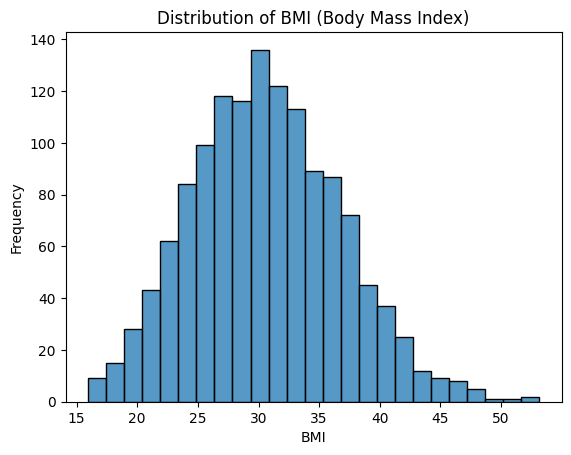

In [23]:
# A histogram is a graph that shows features in different ranges within the data set.
# Using this we can see which values ​​are used more frequently.

sns.histplot(df['bmi'])
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Graph shows that most of the people are in 30 BMI limit with 140 frequency. Also at 50 BMI there is a sudden drop at frequency which might mean that these are outliers. These values might effect overall working of the algorithm.

# Examine the relationship between “smoker” and “charges.

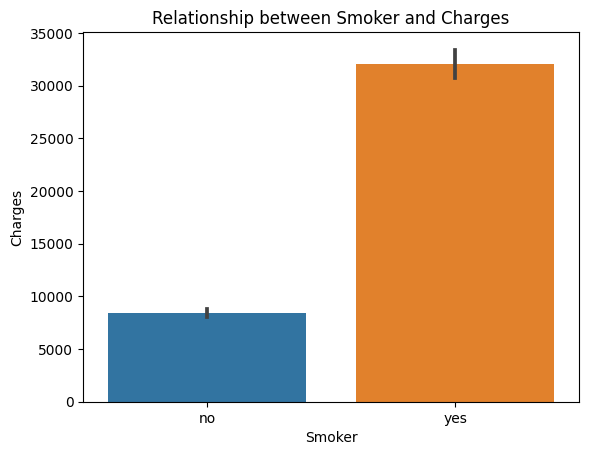

In [24]:
# Used to barplot the relationship between unique values ​​in a grouped categorical column.
# Categorical values ​​are transmitted as the x-axis, and the corresponding aggregated numeric values ​​are transmitted on the y-axis.

sns.barplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

As it seen from the graph smokers pay more for insurance than non smokers.

# Examine the relationship between “smoker” and “region”

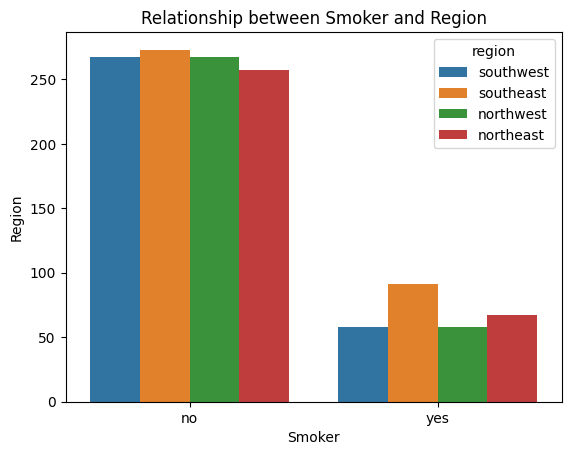

In [25]:
# 'countplot' is a Seaborn function used to visualize the number of unique values ​​of a categorical column in a dataset.
# Used to examine distributions of categorical variables.

sns.countplot(x='smoker', hue='region', data=df)
plt.title('Relationship between Smoker and Region')
plt.xlabel('Smoker')
plt.ylabel('Region')
plt.show()

Unrelated to region, graph shows that non smokers are within same numbers. Different than non smokers, smokers tend to live in southeast mostly, northeast secondly, in southwest and northwest the numbers are nearly same.

# Examine the relationship between “bmi” and “sex”.

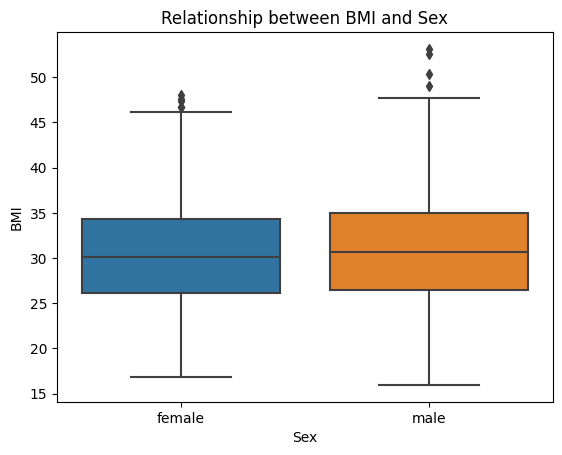

In [26]:
# Using 'boxplot' we can see the distribution of numeric values ​​under a categorical variable in more detail.

sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Relationship between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

Graph shows that in female side BMI values are lower than male BMI values. Which shows that female body weights are less than males. In male side there are more outliers values which means male side have a more diverse distribution.

# Find the "region" with the most "children".

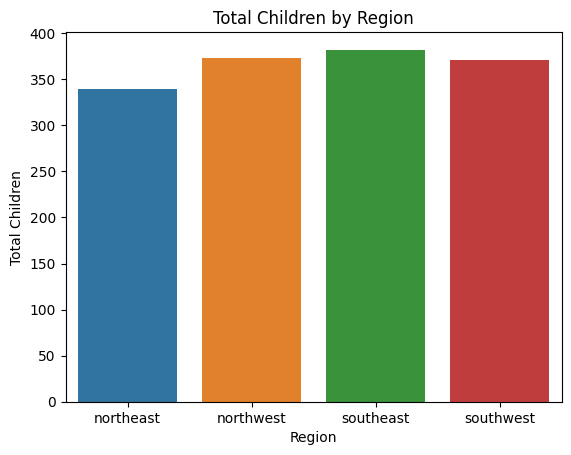

Country with the most children: southeast


In [27]:
# Find children's totals by region.
region_children_sum = df.groupby('region')['children'].sum()

# Find the region with the most children using the idxmax() function.
most_children_region = region_children_sum.idxmax()


sns.barplot(x=region_children_sum.index, y=region_children_sum.values)
plt.title('Total Children by Region')
plt.xlabel('Region')
plt.ylabel('Total Children')
plt.show()

print(f"Country with the most children: {most_children_region}")





# Examine the relationship between “age” and “bmi”.

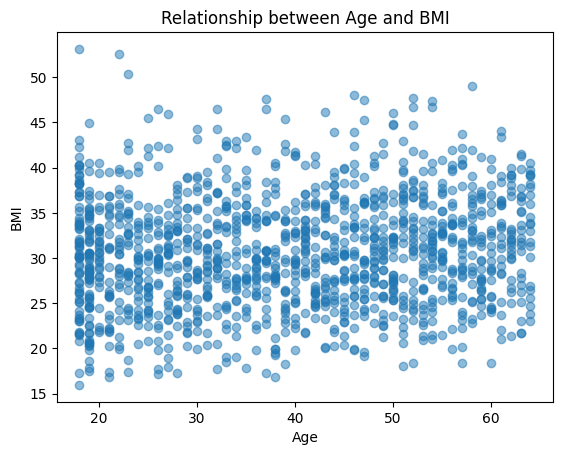

In [28]:
# Used to plot the relationship between two numerical groups as scattered points.

plt.scatter(df['age'], df['bmi'], alpha=0.5)
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Graph shows that most of the data is gathered from age 20. BMI values are generally changes between 20 and 45 which also means that other than these values left ones can be called outliers.

# Examine the relationship between “bmi” and “children.

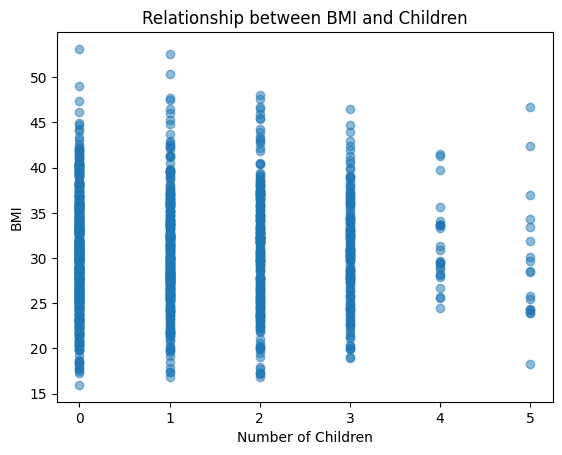

In [29]:
# Used to plot the relationship between two numerical groups as scattered points.

plt.scatter(df['children'], df['bmi'], alpha=0.5)
plt.title('Relationship between BMI and Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

Graph shows that most of the people have 0-3 children, people with 0-1-2 children tend to have same BMI values but in 2 children group BMI value gets gathered at higher values. Group with 3 children tend to have similar BMI values which can be understand from their BMI numbers because it tends to gather in the middle. BMI values higher than 50 can be called outliers because they don't show up constantly in other groups.

# Is there an outlier in the "bmi" variable? Please review.

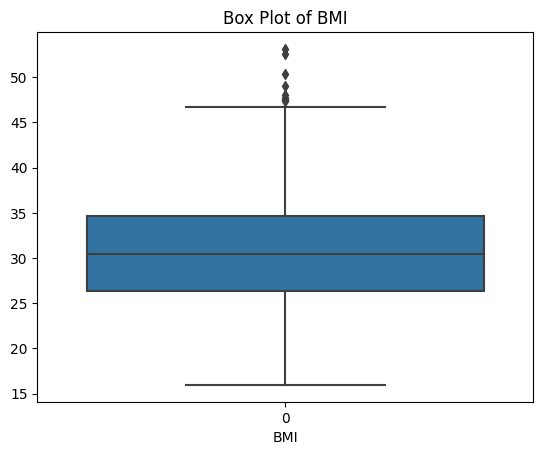

In [30]:
# 'boxplot' is used to detect and visualize outliers and points located beyond the boundary lines represent outliers.

sns.boxplot(df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

Values above the whisker line can be called outliers.

# Examine the relationship between “bmi” and “charges”.

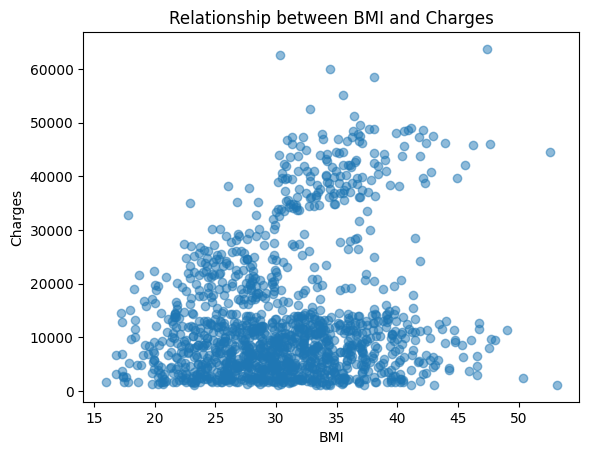

In [31]:
# Used to plot the relationship between two numerical groups as scattered points.

plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

BMI values lower than 30 pay less to charges which can be seen from the increase in BMI numbers and charge increase around 30k to 40k. Single points outside the distribution points shows us the outliers.

# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

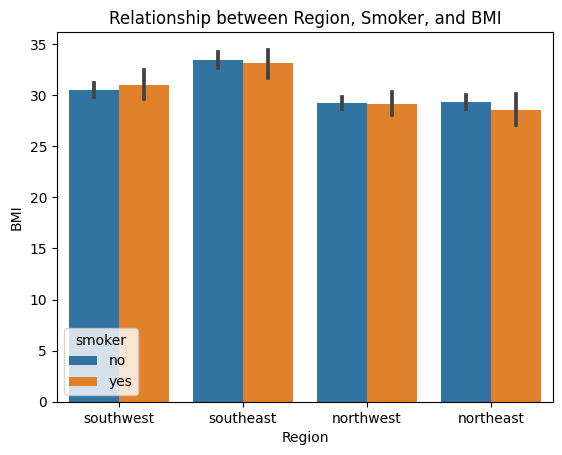

In [32]:
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()

In southeast BMI values tend to be higher than other regions. Southwest is the only region whichs non smokers BMI values are less than its smokers BMI value. Which might mean generally non smokers have higher BMI values. In northwest region smokers and non smokers BMI values are nearly same which might mean region does not effect smoker numbers.

# **Data Preprocessing**
- In this section, prepare the data you have, for training the model.
- Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.
- Split your dataset into X_train,X_test, y_train, y_test.
- Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).


In [33]:
# Separate features (X) and target (y).
# This column is deleted because we want the model to estimate the cost of insurance based on the arguments.
X = df.drop('charges', axis=1)
y = df['charges']

# Apply Label Encoding on 'smoker'
# Since this dataset consist of only two different values, these values ​​can be expressed sequentially by using the label encoder.
label_encoder = LabelEncoder()
X['smoker'] = label_encoder.fit_transform(X['smoker'])

# Apply One-Hot Encoding on 'region' and 'sex'.
# 'region' and 'sex' consists of multiclass variables and these are categorical and unordered data so using 'OneHotEncoder' we can convert multiclass variables into individual columns without sorting effect.
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

region_encoded = onehot_encoder.fit_transform(X[['region']])
sex_encoded = onehot_encoder.fit_transform(X[['sex']])

# Convert the encoded arrays to DataFrames.
region_encoded_df = pd.DataFrame(region_encoded, columns=[f'region_{i}' for i in range(region_encoded.shape[1])])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=[f'sex_{i}' for i in range(sex_encoded.shape[1])])

# Drop the original 'region' and 'sex' columns.
X.drop(['region', 'sex'], axis=1, inplace=True)

# Concatenate the encoded features with the remaining features.
X = pd.concat([X, region_encoded_df, sex_encoded_df], axis=1)

# Split the dataset into training and testing subsets.
# 20 percent of the dataset is used as test data, while the remaining 80 percent is used for training the model. That's why it's written as test_size= 0.2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Model Selection**
- Select several regression models and train them with the preprocessed data.
- Examine the performances of the selected models using cross validation.
- Choose the best performing model

In [34]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Go through each model, train them, and assess their performance using cross-validation.
for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-cv_scores) ** 0.5
    mean_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()

    print(f'{name}:')
    print(f'Mean RMSE: {mean_rmse}')
    print(f'Standard Deviation RMSE: {std_rmse}\n')

Linear Regression:
Mean RMSE: 6147.093944016904
Standard Deviation RMSE: 401.4063928973523

Decision Tree:
Mean RMSE: 6680.609091195767
Standard Deviation RMSE: 568.059011804151

Random Forest:
Mean RMSE: 4953.933097694915
Standard Deviation RMSE: 480.54406299044706



*Based* on the RMSE results, we can say that the Random Forest model demonstrates the best performance. A lower RMSE value indicates that the model's predictions are closer to the actual values.

# **Hyper-parameter Optimization**
- Optimize the hyper-parameters of the model selected in the previous step.
- Optimize parameters with Grid Search. (Grid Search or Randomized Search)

In [35]:
# Define the hyperparameter grid.
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 3, 5]
}

# Create an instance of the Random Forest model.
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object.
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object using the data.
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score.
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE Score:", best_rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE Score: 4728.019682163854


# **Model Evaluation**
- Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean
Squared Error, Mean Absolute Error etc.)

In [37]:
# Get the best model from the grid search.
best_model = grid_search.best_estimator_

# Predictions on the test set.
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 19131768.595400155
Mean Absolute Error: 2486.7026328125835
R-squared: 0.8767669892593362


Mean Squared Error (MSE) measures the average squared differences between the predicted and actual values.
Mean Absolute Error (MAE) measures the average absolute differences between the predicted and actual values.R-squared (R2) measures the proportion of the variance in the dependent variable that's predictable from the independent variables.